# Bike Sharing Assignment

## Importing packages

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
# Importing train test split for splitting the data into two dataframes
from sklearn.model_selection import train_test_split
# Importing minmaxscaler for rescaling
from sklearn.preprocessing import MinMaxScaler
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm  
# Importing variance_inflation_factor to calculate collinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Understanding Data

In [2]:
# Importing Housing.csv
bikesharingdf = pd.read_csv('day.csv')

In [3]:
bikesharingdf.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#Checking whether the datatype are correct and to check is there is any null value present in any of the column.
#As we can see that all the columns are having non-null and there is no need to clean the null values
bikesharingdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Data Cleaning

In [5]:
# Dropping columns which are not required for this analysis - 
bikesharingdf.drop(['instant','dteday','casual','registered'],inplace=True,axis=1)

## Data Preparation

In [6]:
#Converting numeric value to Categorical value as per the Directory sheet
bikesharingdf['season'] = bikesharingdf['season'].map({1:"Spring",2:"Summer",3:"Fall",4:"Winter"})
bikesharingdf['yr'] = bikesharingdf['yr'].map({0:'2018',1:'2019'})
bikesharingdf['mnth']=bikesharingdf['mnth'].apply(lambda x : datetime.datetime.strptime(str(x), "%m").strftime("%B"))
bikesharingdf['weathersit'] = bikesharingdf['weathersit'].map({1:'Clear',2:'Mist & Cloudy', 3:'Light Snow & Rain',4:'Heavy Snow & Rain'})
bikesharingdf['weekday'] = bikesharingdf['weekday'].map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thrusday",5:"Friday",6:"Saturday"})

## Data Visualization

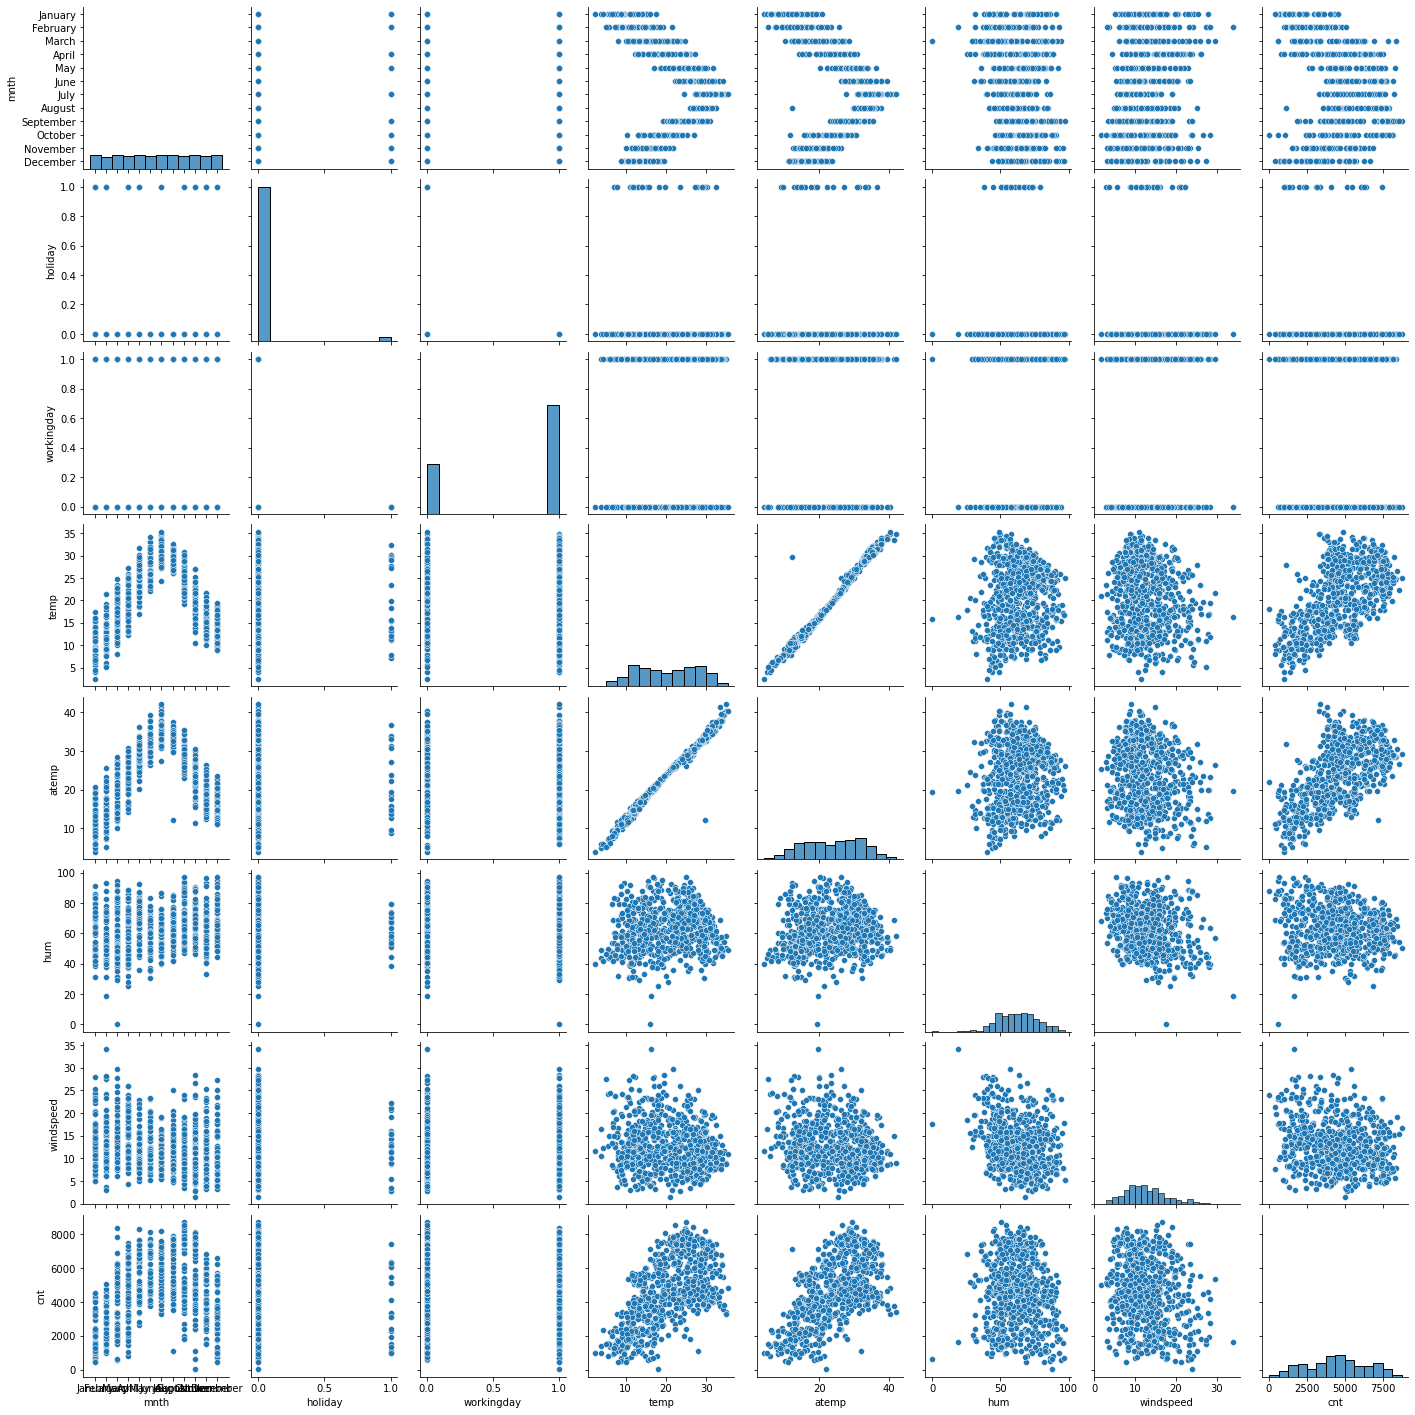

In [7]:
#Visualizing the data
sns.pairplot(bikesharingdf,vars=['mnth','holiday','workingday','temp','atemp','hum','windspeed','cnt'])
plt.show()

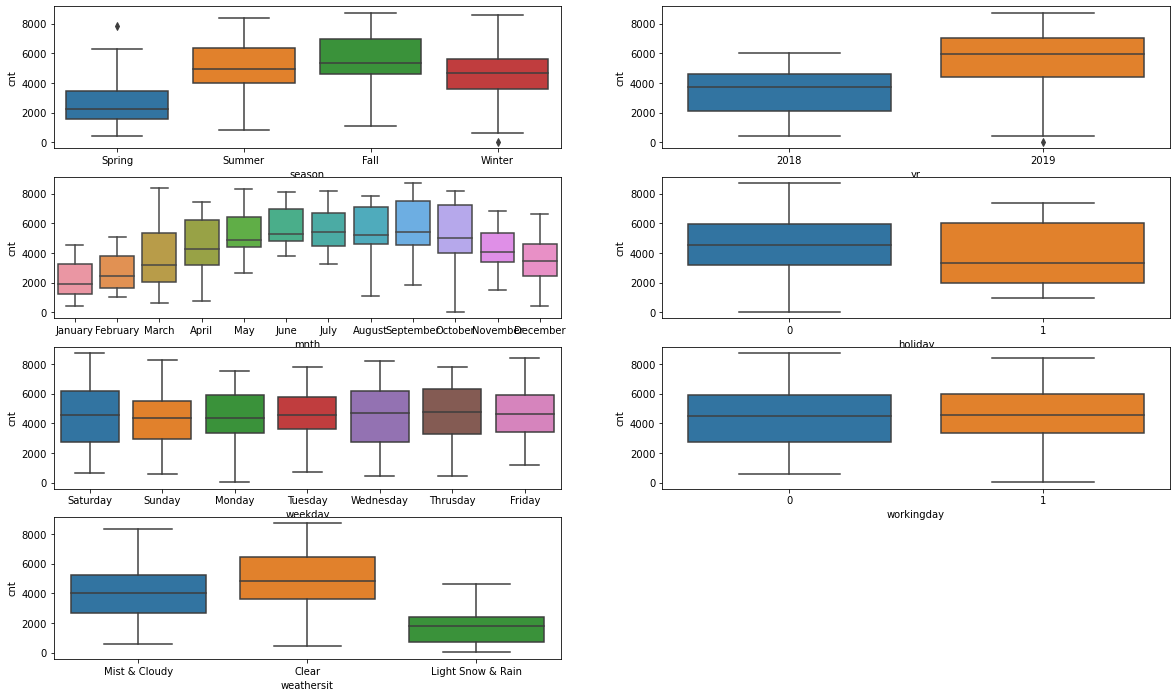

In [8]:
#Plotting the categorical value against the count
plt.figure(figsize=(20, 12))
plt.subplot(4,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikesharingdf)
plt.subplot(4,2,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bikesharingdf)
plt.subplot(4,2,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikesharingdf)
plt.subplot(4,2,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikesharingdf)
plt.subplot(4,2,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikesharingdf)
plt.subplot(4,2,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikesharingdf)
plt.subplot(4,2,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikesharingdf)
plt.show()

### Inference:
- Season vs Cnt - The count of bike sharing is highest at Fall and Lowest at Spring
- Year vs Cnt - The count of bike sharing is highest at 2019
- Mnth vs Cnt - By Comparing overall of the month, we could see that by september there was a peak count in bike sharing
- Holiday vs Cnt - Bike sharing were less during holidays
- Weekday vs Cnt -  During Saturday and Wednesday, There were more count of bike sharing compared to other days
- Workingday vs Cnt - There were higher bike sharing during neither weekend nor holiday
- Weathersit vs Cnt - As we can see that there is no value for the category 'Heavy Rain' and bikers preferred to rent for ride during a clear weather condition

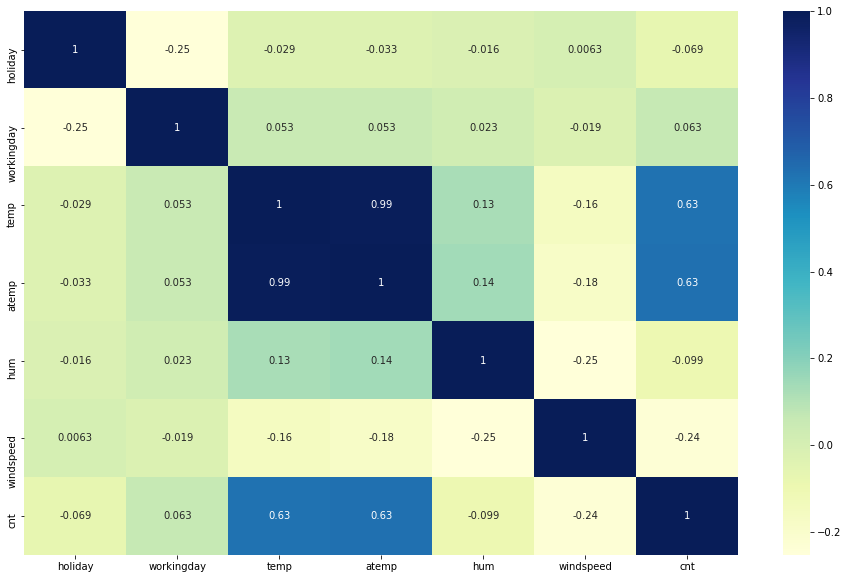

In [9]:
#Plotting Heat map to check the correlation of the variables
plt.figure(figsize = (16, 10))
sns.heatmap(bikesharingdf.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Inference:
As we can infer from the above heat map are
- Temp vs atemp are highly correlated ie 0.99 which is close to 1
- Temp/atemp vs count are the 2nd Highest correlated i.e 0.63
- Windspeed/Humidity/Holiday are negatively correlated when compared with count

## Dummy Variables

In [10]:
# Let's drop the first column from bikesharingdfdummy df using 'drop_first = True'
bikesharingdfdummy = pd.get_dummies(bikesharingdf[['season','mnth','weekday','weathersit','yr']], drop_first = True)

In [11]:
# Add the results to the original bikesharingdf dataframe
bikesharingdf = pd.concat([bikesharingdf, bikesharingdfdummy], axis = 1)

In [12]:
# Now let's see the head of our dataframe.
bikesharingdf.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr_2019
0,Spring,2018,January,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,1,0
1,Spring,2018,January,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,...,0,0,0,1,0,0,0,0,1,0
2,Spring,2018,January,0,Monday,1,Clear,8.050924,9.47025,43.7273,...,0,1,0,0,0,0,0,0,0,0
3,Spring,2018,January,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,Spring,2018,January,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,1,0,0,0


In [13]:
# Drop 'season','mnth','weekday','weathersit','yr' as we have created the dummies for it
bikesharingdf.drop(['season','mnth','weekday','weathersit','yr'], axis = 1, inplace = True)
bikesharingdf.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr_2019
0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,1,0,0,0


## Splitting the Data into Training and Testing Sets

In [14]:
# We specify this so that the train and test data set always have the same rows, respectively
bikeshare_train, bikeshare_test = train_test_split(bikesharingdf, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

 - We will use MinMax scaling.

In [15]:
bikesharescaler = MinMaxScaler()

In [16]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['cnt', 'hum', 'windspeed', 'temp', 'atemp']
bikeshare_train[num_vars] = bikesharescaler.fit_transform(bikeshare_train[num_vars])
bikeshare_train.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr_2019
653,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,...,0,0,0,0,0,1,0,0,0,1
576,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,1,0,0,0,1
426,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,1,0,0,0,0,0,1,1
728,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,1,0,0,0,0,0,1
482,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,1,0,0,0,0,0,1,1


## Dividing into X and Y sets for the model building

In [17]:
y_train = bikeshare_train.pop('cnt')
X_train = bikeshare_train

## Builing Model

In [18]:
# Running RFE with the output number of the variable equal to 13
lm = LinearRegression()
lm.fit(X_train, y_train)
# running RFE
rfe = RFE(lm, 13)             
rfe = rfe.fit(X_train, y_train)

In [19]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', False, 9),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_August', False, 12),
 ('mnth_December', False, 5),
 ('mnth_February', False, 6),
 ('mnth_January', False, 3),
 ('mnth_July', True, 1),
 ('mnth_June', False, 16),
 ('mnth_March', False, 17),
 ('mnth_May', False, 8),
 ('mnth_November', False, 4),
 ('mnth_October', False, 13),
 ('mnth_September', True, 1),
 ('weekday_Monday', False, 10),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', False, 7),
 ('weekday_Thrusday', False, 14),
 ('weekday_Tuesday', False, 11),
 ('weekday_Wednesday', False, 15),
 ('weathersit_Light Snow & Rain', True, 1),
 ('weathersit_Mist & Cloudy', True, 1),
 ('yr_2019', True, 1)]

In [20]:
#columns selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['holiday', 'temp', 'hum', 'windspeed', 'season_Spring', 'season_Summer',
       'season_Winter', 'mnth_July', 'mnth_September', 'weekday_Saturday',
       'weathersit_Light Snow & Rain', 'weathersit_Mist & Cloudy', 'yr_2019'],
      dtype='object')

In [21]:
#columns not selected by RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'mnth_August', 'mnth_December', 'mnth_February',
       'mnth_January', 'mnth_June', 'mnth_March', 'mnth_May', 'mnth_November',
       'mnth_October', 'weekday_Monday', 'weekday_Sunday', 'weekday_Thrusday',
       'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [22]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

### Model 1

In [23]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [24]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [25]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.0
Date:                Tue, 05 Oct 2021   Prob (F-statistic):          7.51e-190
Time:                        23:44:59   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -993.5
Df Residuals:                     496   BIC:                            -934.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [26]:
# dropping 'weekday_Saturday' since  p-value > 0.05
X_train_new = X_train_rfe.drop(["weekday_Saturday"], axis = 1)

### Model 2

In [27]:
# Adding a constant variable
X_train_lm = sm.add_constant(X_train_new)
# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()   
#Let's see the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.2
Date:                Tue, 05 Oct 2021   Prob (F-statistic):          1.69e-190
Time:                        23:44:59   Log-Likelihood:                 509.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     497   BIC:                            -937.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2841      0.034      8.242      0.000       0.216       0.352
holiday                         -0.0974      0.026     -3.809      0.000      -0.148      -0.047
temp                             0.5300      0.034     15.739      0.000       0.464       0.596
hum                             -0.1710      0.038     -4.526      0.000      -0.245      -0.097
windspeed                       -0.1819      0.026     -7.066      0.000      -0.233      -0.131
season_Spring                   -0.0562      0.021     -2.695      0.007      -0.097      -0.015
season_Summer                    0.0519      0.015      3.457      0.001       0.022       0.081
season_Winter                    0.0987      0.017      5.719      0.000       0.065       0.133
mnth_July                       -0.0575      0.018     -3.140      0.002      -0.094      -0.022
mnth_September                   0.0830      0.017      4.962      0.000       0.050       0.116
weathersit_Light Snow & Rain    -0.2382      0.026     -9.034      0.000      -0.290      -0.186
weathersit_Mist & Cloudy        -0.0542      0.011     -5.151      0.000      -0.075      -0.034
yr_2019                          0.2293      0.008     28.219      0.000       0.213       0.245
==============================================================================
Omnibus:                       57.560   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.574
Skew:                          -0.610   Prob(JB):                     2.69e-29
Kurtosis:                       5.169   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
#Checking VIF for multicollinearity
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,74.38
5,season_Spring,5.02
2,temp,3.61
7,season_Winter,3.49
6,season_Summer,2.61
3,hum,1.90
11,weathersit_Mist & Cloudy,1.56
8,mnth_July,1.48
9,mnth_September,1.30
10,weathersit_Light Snow & Rain,1.24


In [29]:
# dropping 'const' since  vif-value > 5 and it should be less than 5
X_train_new = X_train_new.drop(["const"], axis = 1)

### Model 3

In [30]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()   
#Let's see the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.2
Date:                Tue, 05 Oct 2021   Prob (F-statistic):          1.69e-190
Time:                        23:44:59   Log-Likelihood:                 509.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     497   BIC:                            -937.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2841      0.034      8.242      0.000       0.216       0.352
holiday                         -0.0974      0.026     -3.809      0.000      -0.148      -0.047
temp                             0.5300      0.034     15.739      0.000       0.464       0.596
hum                             -0.1710      0.038     -4.526      0.000      -0.245      -0.097
windspeed                       -0.1819      0.026     -7.066      0.000      -0.233      -0.131
season_Spring                   -0.0562      0.021     -2.695      0.007      -0.097      -0.015
season_Summer                    0.0519      0.015      3.457      0.001       0.022       0.081
season_Winter                    0.0987      0.017      5.719      0.000       0.065       0.133
mnth_July                       -0.0575      0.018     -3.140      0.002      -0.094      -0.022
mnth_September                   0.0830      0.017      4.962      0.000       0.050       0.116
weathersit_Light Snow & Rain    -0.2382      0.026     -9.034      0.000      -0.290      -0.186
weathersit_Mist & Cloudy        -0.0542      0.011     -5.151      0.000      -0.075      -0.034
yr_2019                          0.2293      0.008     28.219      0.000       0.213       0.245
==============================================================================
Omnibus:                       57.560   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.574
Skew:                          -0.610   Prob(JB):                     2.69e-29
Kurtosis:                       5.169   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
#Checking VIF for multicollinearity
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,28.06
1,temp,16.02
3,windspeed,4.65
4,season_Spring,4.01
6,season_Winter,3.35
5,season_Summer,2.78
10,weathersit_Mist & Cloudy,2.28
11,yr_2019,2.08
7,mnth_July,1.58
8,mnth_September,1.38


### Model 4 (Final Model)

In [32]:
# dropping 'hum' since  vif-value > 5 and it should be less than 5
X_train_new = X_train_new.drop(["hum"], axis = 1)

In [33]:
# Adding a constant variable
X_train_lm = sm.add_constant(X_train_new)
# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()   
#Let's see the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Tue, 05 Oct 2021   Prob (F-statistic):          2.40e-187
Time:                        23:44:59   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.1996      0.030      6.758      0.000       0.142       0.258
holiday                         -0.0980      0.026     -3.761      0.000      -0.149      -0.047
temp                             0.4915      0.033     14.798      0.000       0.426       0.557
windspeed                       -0.1480      0.025     -5.893      0.000      -0.197      -0.099
season_Spring                   -0.0669      0.021     -3.167      0.002      -0.108      -0.025
season_Summer                    0.0453      0.015      2.971      0.003       0.015       0.075
season_Winter                    0.0831      0.017      4.818      0.000       0.049       0.117
mnth_July                       -0.0524      0.019     -2.811      0.005      -0.089      -0.016
mnth_September                   0.0767      0.017      4.511      0.000       0.043       0.110
weathersit_Light Snow & Rain    -0.2852      0.025    -11.536      0.000      -0.334      -0.237
weathersit_Mist & Cloudy        -0.0816      0.009     -9.301      0.000      -0.099      -0.064
yr_2019                          0.2335      0.008     28.361      0.000       0.217       0.250
==============================================================================
Omnibus:                       59.298   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.189
Skew:                          -0.628   Prob(JB):                     4.41e-30
Kurtosis:                       5.187   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
#Checking VIF for multicollinearity
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.09
2,windspeed,4.60
4,season_Summer,2.21
3,season_Spring,2.08
10,yr_2019,2.07
5,season_Winter,1.79
6,mnth_July,1.58
9,weathersit_Mist & Cloudy,1.55
7,mnth_September,1.34
8,weathersit_Light Snow & Rain,1.08


### Note:
#### If we remove the 'temp' variable then there is a drastic change in R2 value. So keeping temp variable in final model

## Residual Analysis for Train Data

#### So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like

In [35]:
y_train_cnt = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

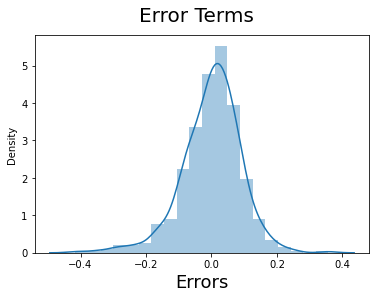

In [36]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
# Plot heading 
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)

### Inference:
#### It follows normal distribution and which is centered at 0

## Making Predictions

#### Applying the scaling on the test sets

In [37]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['cnt', 'hum', 'windspeed', 'temp', 'atemp']
bikeshare_test[num_vars] = bikesharescaler.transform(bikeshare_test[num_vars])
bikeshare_test.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr_2019
184,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,...,0,1,0,0,0,0,0,0,1,0
535,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,0,1,0,0,1
299,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,...,0,0,0,0,1,0,0,0,1,0
221,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,1,0,0,0
152,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,1,0,0,0,0,0


### Dividing into X and Y sets for the model building

In [38]:
y_test = bikeshare_test.pop('cnt')
X_test = bikeshare_test

In [39]:
# Now let's use our model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [40]:
# Making predictions
y_pred = lm.predict(X_test_new)

### Model Evaluation

Text(0, 0.5, 'y_pred')

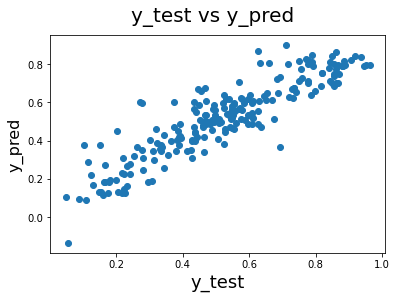

In [41]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
# Plot heading 
fig.suptitle('y_test vs y_pred', fontsize=20)
# X-label
plt.xlabel('y_test', fontsize=18) 
# Y-label
plt.ylabel('y_pred', fontsize=16) 

### Inference:
#### As we can see that the test model behaves in linear regression fashion

In [42]:
#Rounding off the coefficient after 4 decimals
round(lm.params,4)

const                           0.1996
holiday                        -0.0980
temp                            0.4915
windspeed                      -0.1480
season_Spring                  -0.0669
season_Summer                   0.0453
season_Winter                   0.0831
mnth_July                      -0.0524
mnth_September                  0.0767
weathersit_Light Snow & Rain   -0.2852
weathersit_Mist & Cloudy       -0.0816
yr_2019                         0.2335
dtype: float64


### We can see that the equation of our best fitted line is:

#### cnt = 0.1996 - 0.0980 X  holiday + 0.4915  X temp - 0.1480 X windspeed - 0.0669 X season_Spring + 0.0453 X season_Summer + 0.0831 X season_Winter - 0.0524 X mnth_July + 0.0767 X mnth_September - 0.2852 X weathersit_Light Snow & Rain - 0.0816 X weathersit_Mist & Cloudy + 0.2335 X yr_2019

### Note:
- As we can see that Temperature has Highest positive coefficient compared to others.
- In the Year 2019, There are more people preferred Bike rentals especially in the month of September
- We can come to an Conclusion that the Temperature, Season , Weather, Month & Year are the factors affected the demand for the rented bikes
- A positive coefficient (temp,yr_2019,season_Summer,season_Winter,mnth_September) indicates that as the value of the independent variable increases, the mean of the dependent (cnt) variable also tends to increase. A negative coefficient (weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,mnth_July,season_Spring,windspeed,holiday) suggests that as the independent variable increases, the dependent (cnt) variable tends to decrease. 